# Entree Task: Implementing Your Own Neural Networks from Scratch

In [1]:
import math
import numpy as np
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt

## Task 1: Linear Layer 
Implement the forward and backward functions for a linear layer. Please read the requirement details for Task 1 in the code comment and in the pdf document.

In [2]:
class LinearLayer:
    def __init__(self, _m, _n):
        '''
        :param _m: _m is the input X hidden size
        :param _n: _n is the output Y hidden size
        '''
        # "Kaiming initialization" is important for neural network to converge. The NN will not converge without it!
        self.W = (np.random.uniform(low=-10000.0, high=10000.0, size = (_m, _n)))/10000.0*np.sqrt(6.0/ _m)
        self.stored_X = None
        self.W_grad = None #record the gradient of the weight

    def forward(self, X):
        '''
        :param X: shape(X)[0] is batch size and shape(X)[1] is the #features
         (1) Store the input X in stored_data for Backward.
         (2) :return: X * weights
        '''
        
        ########## Code start  ##########
        
        self.stored_X = X
        return X @ self.W
    
        ##########  Code end   ##########
    
    def backward(self, Y_grad):
        '''
        /* shape(output_grad)[0] is batch size and shape(output_grad)[1] is the # output features (shape(weight)[1])
         * 1) Calculate the gradient of the output (the result of the Forward method) w.r.t. the **W** and store the product of the gradient and Y_grad in W_grad
         * 2) Calculate the gradient of the output (the result of the Forward method) w.r.t. the **X** and return the product of the gradient and Y_grad
         */
        '''
        
        ########## Code start  ##########
        
        self.W_grad = self.stored_X.T @ Y_grad
        output = Y_grad @ self.W.T
        return output
        
        ##########  Code end   ##########

## Checkpoint 1: Linear Layer
Check your linear forward and backward function implementations with numerical derivatives.


In [3]:
#gradient check
import copy
#Random test
n = 3
m = 6
Y_grad = np.random.rand(1, m)
test_vector = np.random.rand(1, n)
DELTA = 1e-6
test_layer = LinearLayer(n, m)

test_layer_1 = copy.deepcopy(test_layer)
test_layer_2 = copy.deepcopy(test_layer)

test_layer.forward(test_vector)
Your_backward = test_layer.backward(Y_grad)

cal_gradient = np.zeros((np.shape(test_vector)[0], np.shape(test_vector)[1]))
for t_p in range(np.shape(test_vector)[0]):
    for i in range(np.shape(test_vector)[1]):
        test_vector_1 = copy.deepcopy(test_vector)
        test_vector_2 = copy.deepcopy(test_vector)
        test_vector_1[t_p][i] = test_vector_1[t_p][i] + DELTA
        test_vector_2[t_p][i] = test_vector_2[t_p][i] - DELTA

        cal_gradient[t_p][i] = np.sum(
            (np.dot(Y_grad, np.transpose(test_layer_1.forward(test_vector_1) - test_layer_2.forward(test_vector_2))/(2*DELTA))))


print('Your gradient: ',Your_backward)
print('Numerical gradient:',cal_gradient)
print('Error: ',abs(np.sum(Your_backward - cal_gradient)))
if abs(np.sum(Your_backward - cal_gradient)) < 1e-4:
    print('Correct backward. Congratulations!')
else:
    print('Wrong backawrd. Please check your implementation again.')

Your gradient:  [[-1.26850095 -0.95656919 -0.56826001]]
Numerical gradient: [[-1.26850095 -0.95656919 -0.56826001]]
Error:  3.350841826232909e-11
Correct backward. Congratulations!


## Task 2: Non-Linear Activation
Implement the forward and backward functions for a nonlinear layer. Please read the requirement details for Task 2 in the code comment and in the pdf document.

In [4]:
class ReLU:
    #sigmoid layer
    def __init__(self):
        self.stored_X = None # Here we should store the input matrix X for Backward

    def forward(self, X):
        '''
        /*
         *  The input X matrix has the dimension [#samples, #features].
         *  The output Y matrix has the same dimension as the input X.
         *  You need to perform ReLU on each element of the input matrix to calculate the output matrix.
         *  TODO: 1) Create an output matrix by going through each element in input and calculate relu=max(0,x) and
         *  TODO: 2) Store the input X in self.stored_X for Backward.
         */
        '''
        
        ########## Code start  ##########
        
        Y = np.zeros((X.shape))
        
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                Y[i, j] = max(0, X[i, j])
                
        self.stored_X = X   
        return Y
        
        ##########  Code end   ##########

    def backward(self, Y_grad):
        '''
         /*  grad_relu(x)=1 if relu(x)=x
         *  grad_relu(x)=0 if relu(x)=0
         *
         *  The input matrix has the name "output_grad." The name is confusing (it is actually the input of the function). But the name follows the convension in PyTorch.
         *  The output matrix has the same dimension as input.
         *  The output matrix is calculated as grad_relu(stored_X)*Y_grad.
         *  TODO: returns the output matrix calculated above
         */
        '''
        
        ########## Code start  ##########

        output = np.zeros((Y_grad.shape))
        
        for i in range(Y_grad.shape[0]):
            for j in range(Y_grad.shape[1]):
                if self.stored_X[i, j] > 0:
                    output[i, j] = Y_grad[i, j]
        
        return output
        
        ##########  Code end   ##########

## Checkpoint 2: ReLU 
Check your ReLU forward and backward functions 

In [5]:
#gradient check
import copy
#Random test
n = 3
Y_grad = np.random.rand(1, n)
test_vector = np.random.rand(1, n)
DELTA = 1e-6
test_layer = ReLU()

test_layer_1 = copy.deepcopy(test_layer)
test_layer_2 = copy.deepcopy(test_layer)

test_layer.forward(test_vector)
Your_backward = test_layer.backward(Y_grad)

cal_gradient = np.zeros((np.shape(test_vector)[0], np.shape(test_vector)[1]))
for t_p in range(np.shape(test_vector)[0]):
    for i in range(np.shape(test_vector)[1]):
        test_vector_1 = copy.deepcopy(test_vector)
        test_vector_2 = copy.deepcopy(test_vector)
        test_vector_1[t_p][i] = test_vector_1[t_p][i] + DELTA
        test_vector_2[t_p][i] = test_vector_2[t_p][i] - DELTA

        cal_gradient[t_p][i] = np.sum(
            (np.dot(Y_grad, np.transpose(test_layer_1.forward(test_vector_1) - test_layer_2.forward(test_vector_2))/(2*DELTA))))


print('Your gradient: ',Your_backward)
print('Numerical gradient:',cal_gradient)
print('Error: ',abs(np.sum(Your_backward - cal_gradient)))
if abs(np.sum(Your_backward - cal_gradient)) < 1e-4:
    print('Correct backward. Congratulations!')
else:
    print('Wrong backawrd. Please check your implementation again.')

Your gradient:  [[0.24912155 0.18296755 0.97219351]]
Numerical gradient: [[0.24912155 0.18296755 0.97219351]]
Error:  3.346656285430072e-11
Correct backward. Congratulations!


## Task 3: Loss Function
Implement the MSE loss function and its backward derivative. Please read the requirement details for Task 3 in the code comment and in the pdf document. 

In [6]:
class MSELoss:
    # cross entropy loss
    # return the mse loss mean(y_j-y_pred_i)^2
    
    def __init__(self):
        self.stored_diff = None
    def forward(self, prediction, groundtruth):
        '''
        /*  TODO: 1) Calculate stored_data=pred-truth
         *  TODO: 2) Calculate the MSE loss as the squared sum of all the elements in the stored_data divided by the number of elements, i.e., MSE(pred, truth) = ||pred-truth||^2 / N, with N as the total number of elements in the matrix
         */
        '''
        
        ########## Code start  ##########

        self.stored_diff = prediction - groundtruth
        
        N = 0
        for i in range(prediction.shape[0]):
            for j in range(prediction.shape[1]):
                N += ((prediction[i, j] - groundtruth[i, j]) ** 2)
        
        # This is the sum of all (pre-tru)^2 devided by # of samples
        MSE_loss = N / prediction.shape[0]
        return MSE_loss
        
        ##########  Code end   ##########

    # return the gradient of the input data
    def backward(self):
        '''
        /* TODO: return the gradient matrix of the MSE loss
         * The output matrix has the same dimension as the stored_data (make sure you have stored the (pred-truth) in stored_data in your forward function!)
         * Each element (i,j) of the output matrix is calculated as grad(i,j)=2(pred(i,j)-truth(i,j))/N
         */
        '''
        
        ########## Code start  ##########
        
        output = np.zeros((self.stored_diff.shape))
        
        for i in range(output.shape[0]):
            for j in range(output.shape[1]):
                output[i,j] = 2 * (self.stored_diff[i, j]) / output.shape[0]
                
        return output
        
        ##########  Code end   ##########

## Task 4: Network Architecture
Implement your own neural network architecture. Please read the requirement for Task 4 in the pdf document.

In [7]:
class Network:
    def __init__(self, layers_arch):
        '''
        /*  TODO: 1) Initialize the array for input layers with the proper feature sizes specified in the input vector.
         * For the linear layer, in each pair (in_size, out_size), the in_size is the feature size of the previous layer and the out_size is the feature size of the output (that goes to the next layer)
         * In the linear layer, the weight should have the shape (in_size, out_size).
         
         *  For example, if layers_arch = [['Linear', (256, 128)], ['ReLU'], ['Linear', (128, 64)], ['ReLU'], ['Linear', (64, 32)]],
       * 							 then there are three linear layers whose weights are with shapes (256, 128), (128, 64), (64, 32),
       * 							 and there are two non-linear layers.
         *  Attention: * The output feature size of the linear layer i should always equal to the input feature size of the linear layer i+1.
       */
        '''
       
        ########## Code start  ##########
       
        self.layers = []
        
        for i in range(len(layers_arch)):
            
            if (layers_arch[i][0] == "Linear"):
                self.layers.append(LinearLayer(layers_arch[i][1][0], layers_arch[i][1][1]))
            
            elif (layers_arch[i][0] == "ReLU"):
                self.layers.append(ReLU())
    
        ##########  Code end   ##########
        
    def forward(self, X):
        '''
        /*
         * TODO: propagate the input data for the first linear layer throught all the layers in the network and return the output of the last linear layer.
         * For implementation, you need to write a for-loop to propagate the input from the first layer to the last layer (before the loss function) by going through the forward functions of all the layers.
         * For example, for a network with k linear layers and k-1 activation layers, the data flow is:
         * linear[0] -> activation[0] -> linear[1] ->activation[1] -> ... -> linear[k-2] -> activation[k-2] -> linear[k-1]
         */
        '''
        
        ########## Code start  ##########
       
        input_data = X
        
        for i in range(len(self.layers)):
            input_data = self.layers[i].forward(input_data) 
            
        return input_data
    
        ##########  Code end   ##########

    def backward(self, Y_grad):
        '''
        /* Propagate the gradient from the last layer to the first layer by going through the backward functions of all the layers.
         * TODO: propagate the gradient of the output (we got from the Forward method) back throught the network and return the gradient of the first layer.

         * Notice: We should use the chain rule for the backward.
         * Notice: The order is opposite to the forward.
         */
        '''
        
        ########## Code start  ##########
       
        gradient = Y_grad
        
        for i in range(len(self.layers)-1, -1, -1):
            gradient = self.layers[i].backward(gradient)
        
        return gradient
    
        ##########  Code end   ##########

## Checkpoint 3: Regression Network
Check your network implementation with a simple regression task. Here we also provide you a sample implementation for the gradient descent algorithm, which you will find useful for your own Classifier implementation.  

In [8]:
class Regressor:
    #Classifier
    def __init__(self, layers_arch, data_function, learning_rate = 1e-3, batch_size = 32, max_epoch = 200):

        input_feature_size = 2
        output_feature_size = 2

        self.train_data = []
        self.train_label = []
        self.test_data = []
        self.test_label = []

        self.data_function = data_function
        
        self.layers_arch = layers_arch
        self.net = Network(layers_arch)
        self.loss_function = MSELoss()

        self.max_epoch = max_epoch
        self.batch_size = batch_size
        self.learning_rate = learning_rate

    def dataloader(self):
        
        '''
        We randomly generate the mapping: (x)->(x^3+x^2 + 1)
        '''
        self.train_data = np.zeros((1000,1))
        self.train_label = np.zeros((1000, 1))

        for i in range(1000):
            self.train_data[i][0] = np.random.uniform(low=0.0, high=10000.0)/10000.0
            self.train_label[i][0] = self.data_function(self.train_data[i][0])

        self.test_data = np.zeros((200, 1))
        self.test_label = np.zeros((200, 1))

        for i in range(200):
            self.test_data[i][0] = np.random.uniform(low=-0.0, high=10000.0) / 10000.0
            self.test_label[i][0] = self.data_function(self.test_data[i][0])



    def Train_One_Epoch(self):
        '''
        Here we train the network using gradient descent
        '''
        loss = 0
        n_loop = int(math.ceil(len(self.train_data)/self.batch_size))

        for i in range(n_loop):
            batch_data = self.train_data[i * self.batch_size : (i+1)*self.batch_size]
            batch_label = self.train_label[i * self.batch_size : (i+1)*self.batch_size]
            
            '''
            /*  Forward the data to the network.
             *  Forward the result to the loss function.
             *  Backward.
             *  Update the weights with weight gradients.
             *  Do not forget the learning rate!
             */
            '''
            
            ########## Sample code  ##########
            prediction = self.net.forward(batch_data)
            loss += self.loss_function.forward(prediction, batch_label)

            pred_grad = self.loss_function.backward()
            self.net.backward(pred_grad)
            for i in range(len(self.layers_arch)):
                if self.layers_arch[i][0] == 'Linear':
                    self.net.layers[i].W -= self.net.layers[i].W_grad * self.learning_rate
            ##########  Sample code ##########
            
        return loss/n_loop

    def Test(self):
        prediction = self.net.forward(self.test_data)
        loss = self.loss_function.forward(prediction, self.test_label)
        return loss

    def Train(self):
        self.dataloader()
        for i in range(self.max_epoch):
            train_loss = self.Train_One_Epoch()
            test_loss = self.Test()
            print("Epoch: ", str(i+1), "/", str(self.max_epoch), " | Train loss: ", train_loss, " | Test loss : ", test_loss)


In [9]:
train_data_path = './MNIST_Sub/train_data.txt'
train_labels_path = './MNIST_Sub/train_labels.txt'
test_data_path = './MNIST_Sub/test_data.txt'
test_labels_path = './MNIST_Sub/test_labels.txt'

# regressor
regressor_layers_arch = [['Linear', (1, 16)], ['ReLU'], ['Linear', (16, 16)], ['ReLU'], ['Linear', (16, 1)]]
def data_function(x):
    return np.power(x,3) + pow(x,2) + 1
regressor = Regressor(regressor_layers_arch, data_function, learning_rate = 1e-4, batch_size = 32, max_epoch = 200)
regressor.Train()

regressor.Test()


Epoch:  1 / 200  | Train loss:  5.107800674439522  | Test loss :  4.478550473279807
Epoch:  2 / 200  | Train loss:  4.053379447137353  | Test loss :  3.5545422928771275
Epoch:  3 / 200  | Train loss:  3.228647737745442  | Test loss :  2.8294623713262865
Epoch:  4 / 200  | Train loss:  2.5799056460590206  | Test loss :  2.2580053779256994
Epoch:  5 / 200  | Train loss:  2.0678323513708228  | Test loss :  1.806511783508096
Epoch:  6 / 200  | Train loss:  1.6629012406412134  | Test loss :  1.449413913859795
Epoch:  7 / 200  | Train loss:  1.3424967406314026  | Test loss :  1.1669564223298527
Epoch:  8 / 200  | Train loss:  1.0890357045905579  | Test loss :  0.9436820979019314
Epoch:  9 / 200  | Train loss:  0.8886998591715011  | Test loss :  0.7673906460573544
Epoch:  10 / 200  | Train loss:  0.7305506702308853  | Test loss :  0.6283981871731164
Epoch:  11 / 200  | Train loss:  0.605890598002185  | Test loss :  0.5189937840249693
Epoch:  12 / 200  | Train loss:  0.5077881346394426  | Test

Epoch:  99 / 200  | Train loss:  0.15635453990527948  | Test loss :  0.12805264482049936
Epoch:  100 / 200  | Train loss:  0.15635453988001072  | Test loss :  0.12805265027265944
Epoch:  101 / 200  | Train loss:  0.15635453985917624  | Test loss :  0.12805265505883695
Epoch:  102 / 200  | Train loss:  0.15635453984192474  | Test loss :  0.12805265926025555
Epoch:  103 / 200  | Train loss:  0.15635453982758005  | Test loss :  0.12805266294826217
Epoch:  104 / 200  | Train loss:  0.15635453981560368  | Test loss :  0.12805266618552072
Epoch:  105 / 200  | Train loss:  0.15635453980556466  | Test loss :  0.1280526690270641
Epoch:  106 / 200  | Train loss:  0.15635453979711736  | Test loss :  0.12805267152121944
Epoch:  107 / 200  | Train loss:  0.15635453978998332  | Test loss :  0.12805267371042184
Epoch:  108 / 200  | Train loss:  0.15635453978393749  | Test loss :  0.1280526756319309
Epoch:  109 / 200  | Train loss:  0.15635453977879704  | Test loss :  0.12805267731845926
Epoch:  110 /

Epoch:  195 / 200  | Train loss:  0.15635453974598848  | Test loss :  0.12805268941852868
Epoch:  196 / 200  | Train loss:  0.15635453974598207  | Test loss :  0.12805268941854872
Epoch:  197 / 200  | Train loss:  0.1563545397459757  | Test loss :  0.12805268941856635
Epoch:  198 / 200  | Train loss:  0.15635453974596933  | Test loss :  0.1280526894185819
Epoch:  199 / 200  | Train loss:  0.15635453974596297  | Test loss :  0.1280526894185956
Epoch:  200 / 200  | Train loss:  0.15635453974595664  | Test loss :  0.12805268941860762


0.12805268941860762

## Task 5: Classfication Network
Implement your own classifier with gradient descent. Please read the requirement for Task 5 in the pdf document.

In [10]:
def One_Hot_Encode(labels, classes = 10):
    '''
    /*  Make the labels one-hot.
     *  For example, if there are 5 classes {0, 1, 2, 3, 4} then
     *  [0, 2, 4] -> [[1, 0, 0, 0, 0],
     * 								[0, 0, 1, 0, 0],
     * 								[0, 0, 0, 0, 1]]
     */
    '''
    
    ########## Code start  ##########
    
    one_hot = np.zeros((labels.shape[0], classes))
    
    for i in range(one_hot.shape[0]):
        for j in range(classes):
            if labels[i] == j:
                one_hot[i,j] = 1
            else:
                one_hot[i,j] = 0
                
    return one_hot
    
    ##########  Code end   ##########

In [11]:
### Do not change the code ###
### visualize the samples 

def visualization(x, y_true, y_pred = None, rows = 2, cols = 5, split = 'train'):
    num_row = rows
    num_col = cols
    images = np.reshape(x, (-1, 28, 28))
    labels_true = y_true
    labels_pred = y_pred
    
    # plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num_row * num_col):
        ax = axes[i//num_col, i%num_col]
        ax.imshow(images[i], cmap='gray')
        if split == 'train':
            ax.set_title('Label: {}'.format(labels_true[i]))
        elif split == 'test':
            col = 'green'
            if labels_pred[i] != labels_true[i]:
                col = 'red'
            ax.set_title('Label: {} vs {}'.format(labels_true[i], labels_pred[i]), color = col)
            
    plt.tight_layout()
    plt.show()

In [12]:
class Classifier:
    #Classifier
    def __init__(self, train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch, learning_rate = 1e-3, batch_size = 32, max_epoch = 200, classes = 10):
        self.classes = classes

        self.train_data_path = train_data_path
        self.train_labels_path = train_labels_path
        self.test_data_path = test_data_path
        self.test_labels_path = test_labels_path


        self.train_data = [] #The shape of train data should be (n_samples,28^2)
        self.train_labels = []
        self.test_data = []
        self.test_labels = []
        
        self.layers_arch = layers_arch
        self.net = Network(layers_arch)
        self.loss_function = MSELoss()

        self.max_epoch = max_epoch
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        
        # Initialize arrays for plot
        self.loss_data = []
        self.accuracy_data = []

    def dataloader(self):

        with open(self.train_data_path, "r") as f:
            for line in f:
                self.train_data.append(np.array(line.strip().split()).astype(np.float64)/255.0)
        self.train_data = np.array(self.train_data)

        with open(self.train_labels_path, "r") as f:
            for line in f:
                self.train_labels.append(int(line.strip()))
        self.train_labels = np.array(self.train_labels)

        with open(self.test_data_path, "r") as f:
            for line in f:
                self.test_data.append(np.array(line.strip().split()).astype(np.float64)/255.0)
        self.test_data = np.array(self.test_data)

        with open(self.test_labels_path, "r") as f:
            for line in f:
                self.test_labels.append(int(line.strip()))
        self.test_labels = np.array(self.test_labels)


    def Train_One_Epoch(self):
        '''
        Here we train the network using gradient descent
        '''
        loss = 0
        n_loop = int(math.ceil(len(self.train_data) / self.batch_size))
        for i in range(n_loop):
            batch_data = self.train_data[i * self.batch_size: (i + 1) * self.batch_size]
            batch_label = self.train_labels[i * self.batch_size: (i + 1) * self.batch_size]
            batch_one_hot_label = One_Hot_Encode(batch_label, classes = self.classes)
            
            '''
             /*  Forward the data to the network.
             *  Forward the result to the loss function.
             *  Backward.
             *  Update the weights with weight gradients.
             *  Do not forget the learning rate!
             */
            '''
            
            ########## Code start  ##########
            
            # Basically same exact code as above for the test
            prediction = self.net.forward(batch_data)
            loss += self.loss_function.forward(prediction, batch_one_hot_label)

            pred_gradient = self.loss_function.backward()
            self.net.backward(pred_gradient)
            for i in range(len(self.layers_arch)):
                if self.layers_arch[i][0] == 'Linear':
                    self.net.layers[i].W -= self.net.layers[i].W_grad * self.learning_rate

            ##########  Code end   ##########
            
        
        return loss / n_loop
    

    def visualize(self):
        score = self.net.forward(self.test_data)
        label_preds = np.argmax(score, axis=1)
        visualization(self.test_data, self.test_labels, label_preds, int(len(label_preds)/ 10), 10, split = 'test')
        
    def Test(self):
        '''
        the class with max score is our predicted label
        '''
        score = self.net.forward(self.test_data)
        accuracy = 0
        for i in range(np.shape(score)[0]):
            one_label_list = score[i].tolist()
            label_pred = one_label_list.index(max(one_label_list))
            if label_pred == self.test_labels[i]:
                accuracy = accuracy +1

        accuracy = accuracy/np.shape(score)[0]
        return accuracy

    def Train(self):
        self.dataloader()
        for i in range(self.max_epoch):
            loss = self.Train_One_Epoch()
            accuray = self.Test()
            
            # Append for graph
            self.loss_data.append((i + 1, loss))
            self.accuracy_data.append((i + 1, accuray))
            
            print("Epoch: ", str(i+1), "/", str(self.max_epoch), " | Train loss: ", loss, " | Test Accuracy : ", accuray)

    def Create_Plot(self):
        plt.figure()
        plt.xlim(0, self.max_epoch)
        plt.ylim(0,1)
        plt.grid()
        plt.ylabel('Loss and Accuracy Values')
        plt.xlabel('Epoch')
        plt.title('Loss Convergence Rate and Testing Accuracy')
        
        for i in range(len(self.loss_data)):
            plt.plot(self.loss_data[i][0], self.loss_data[i][1], marker = 'o', markersize = 3, color = 'blue')
            plt.plot(self.accuracy_data[i][0], self.accuracy_data[i][1], marker = 'o', markersize = 3, color = 'red')
            
        plt.show()


## Evaluation
That's it! Congratulations on finishing everything. Now try your network on MNIST!

Epoch:  1 / 200  | Train loss:  1.1875642112259488  | Test Accuracy :  0.485
Epoch:  2 / 200  | Train loss:  0.7475941393841575  | Test Accuracy :  0.6
Epoch:  3 / 200  | Train loss:  0.62291984608821  | Test Accuracy :  0.685
Epoch:  4 / 200  | Train loss:  0.5513287043154599  | Test Accuracy :  0.705
Epoch:  5 / 200  | Train loss:  0.5018899719957403  | Test Accuracy :  0.73
Epoch:  6 / 200  | Train loss:  0.46432220214479264  | Test Accuracy :  0.725
Epoch:  7 / 200  | Train loss:  0.4343663771408351  | Test Accuracy :  0.74
Epoch:  8 / 200  | Train loss:  0.4095675597999121  | Test Accuracy :  0.755
Epoch:  9 / 200  | Train loss:  0.38849396656972246  | Test Accuracy :  0.755
Epoch:  10 / 200  | Train loss:  0.3700602056589457  | Test Accuracy :  0.78
Epoch:  11 / 200  | Train loss:  0.3538974636819585  | Test Accuracy :  0.785
Epoch:  12 / 200  | Train loss:  0.3394355038085728  | Test Accuracy :  0.79
Epoch:  13 / 200  | Train loss:  0.32642707119789777  | Test Accuracy :  0.79
E

Epoch:  106 / 200  | Train loss:  0.06733418659303154  | Test Accuracy :  0.85
Epoch:  107 / 200  | Train loss:  0.06660833915229077  | Test Accuracy :  0.85
Epoch:  108 / 200  | Train loss:  0.06590142064334707  | Test Accuracy :  0.85
Epoch:  109 / 200  | Train loss:  0.06519957843133714  | Test Accuracy :  0.85
Epoch:  110 / 200  | Train loss:  0.0645125189369799  | Test Accuracy :  0.855
Epoch:  111 / 200  | Train loss:  0.06383481475556455  | Test Accuracy :  0.855
Epoch:  112 / 200  | Train loss:  0.06317104310765193  | Test Accuracy :  0.855
Epoch:  113 / 200  | Train loss:  0.06251396565093328  | Test Accuracy :  0.855
Epoch:  114 / 200  | Train loss:  0.06186124638137021  | Test Accuracy :  0.86
Epoch:  115 / 200  | Train loss:  0.061225505380023706  | Test Accuracy :  0.86
Epoch:  116 / 200  | Train loss:  0.06059351202705272  | Test Accuracy :  0.86
Epoch:  117 / 200  | Train loss:  0.05998084669816318  | Test Accuracy :  0.86
Epoch:  118 / 200  | Train loss:  0.059376079050

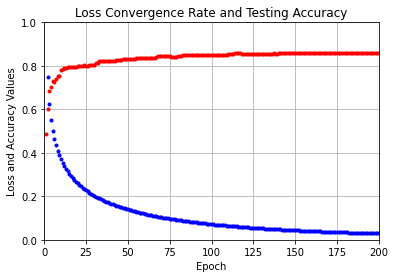

In [13]:
train_data_path = './MNIST_Sub/train_data.txt'
train_labels_path = './MNIST_Sub/train_labels.txt'
test_data_path = './MNIST_Sub/test_data.txt'
test_labels_path = './MNIST_Sub/test_labels.txt'


#classifier
classifier_layers_arch = [['Linear', (28*28, 256)], ['ReLU'], ['Linear', (256, 10)]]
cls = Classifier(train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch = classifier_layers_arch, learning_rate = 0.01, batch_size = 32, max_epoch = 200)
cls.Train()

cls.Create_Plot()


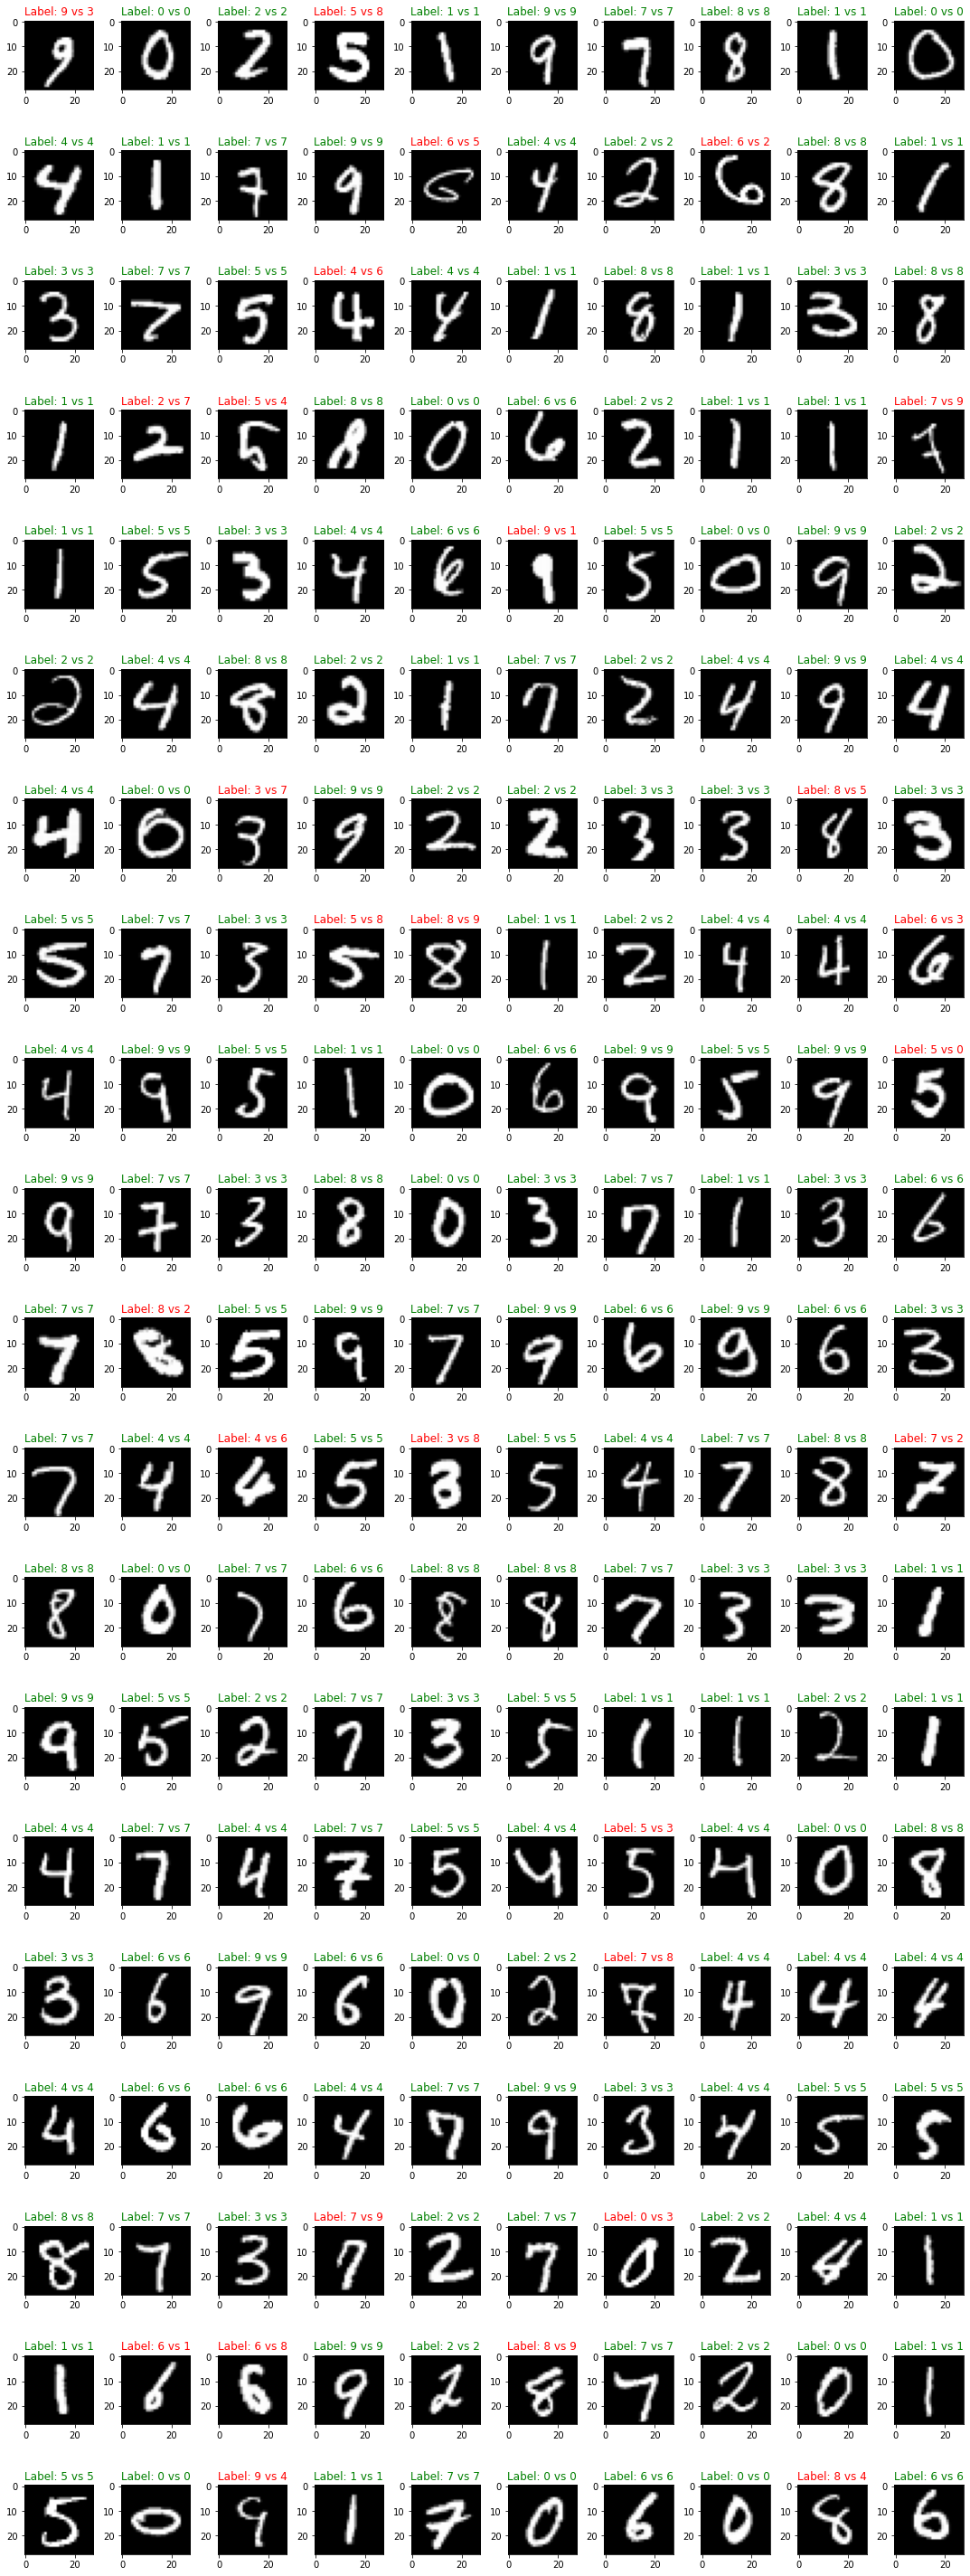

In [14]:
# visualize the result
cls.visualize()

In [15]:
# print prediction accuracy
cls.Test()

0.86